In [3]:
import spacy

In [4]:
nlp=spacy.blank("en")

In [5]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

In [6]:
for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


In [7]:
doc[0]

Dr.

In [8]:
doc[1].text

'Strange'

In [9]:
type(nlp)

spacy.lang.en.English

In [10]:
type(doc)

spacy.tokens.doc.Doc

In [11]:
nlp.pipe_names

[]

In [12]:
span=doc[0:5]

In [13]:
span

Dr. Strange loves pav bhaji

In [14]:
type(span)

spacy.tokens.span.Span

# Token Attributes

In [15]:
doc=nlp("Stanly gave two $ to his brother")

In [16]:
token0=doc[0]


In [17]:
token0

Stanly

In [18]:
token0.is_alpha

True

In [19]:
token0.like_num

False

# collecting email id from sheet

In [28]:
with open("students.txt") as f:
    text=f.readlines()
text

['stanly@divum.in \n',
 'anbu@divum.in\n',
 'darshan@divum.in\n',
 'vijesh@divum.in']

In [32]:
text=" ".join(text)
text

'stanly@divum.in \n anbu@divum.in\n darshan@divum.in\n vijesh@divum.in'

In [33]:
doc = nlp(text)
doc

stanly@divum.in 
 anbu@divum.in
 darshan@divum.in
 vijesh@divum.in

In [35]:
emails=[]
for i in doc:
    if i.like_email:
        emails.append(i)

In [36]:
emails

[stanly@divum.in, anbu@divum.in, darshan@divum.in, vijesh@divum.in]

# customizing token

In [37]:
from spacy.symbols import ORTH

nlp=spacy.blank('en')
doc=nlp("gimme double cheese extra large healthy pizza")
tokens=[token.text for token in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [38]:
nlp.tokenizer.add_special_case('gimme',[
    {ORTH:"gim"},
    {ORTH:"me"}])
doc=nlp("gimme double cheese extra large healthy pizza")
tokens=[token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

# Sentence Tokenization or Segmentation

In [39]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for s in doc.sents:
    print(s)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [40]:
nlp.pipeline

[]

In [41]:
nlp.add_pipe('sentencizer')

In [42]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x7fe4b1bbef00>)]

In [43]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


# Excercise

In [44]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

In [45]:
doc=nlp(text)

In [49]:
type(doc[1])

spacy.tokens.token.Token

In [54]:
url=[]
for i in doc:
    if i.like_url:
        url.append(i)
        print(i)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


In [53]:
url

[http://www.data.gov/,
 http://www.science,
 http://data.gov.uk/.,
 http://www3.norc.org/gss+website/,
 http://www.europeansocialsurvey.org/.]

In [55]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

In [57]:
doc=nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text,doc[token.i+1].text)

two $
500 €


# pipeline tutorial


## Blank NLP pipeline 

In [58]:
import spacy

In [59]:
nlp=spacy.blank("en")
doc=nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for t in doc:
    print(t)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


In [60]:
nlp.pipe_names

[]

In [61]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [62]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fe571a4eb60>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fe54cf3efe0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fe54cd41770>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fe54c756cc0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fe54c77f500>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fe54cc4d230>)]

In [63]:
doc=nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for token in doc:
    print(token," | ",spacy.explain(token.pos_)," | ",token.lemma_)

Captain  |  proper noun  |  Captain
america  |  proper noun  |  america
ate  |  verb  |  eat
100  |  numeral  |  100
$  |  noun  |  $
of  |  adposition  |  of
samosa  |  proper noun  |  samosa
.  |  punctuation  |  .
Then  |  adverb  |  then
he  |  pronoun  |  he
said  |  verb  |  say
I  |  pronoun  |  I
can  |  auxiliary  |  can
do  |  verb  |  do
this  |  pronoun  |  this
all  |  determiner  |  all
day  |  noun  |  day
.  |  punctuation  |  .


# Name Entity Recognition 

In [65]:
doc= nlp("Tesla Inc is going to acquire twitter for $45 billion")
for e in doc.ents:
    print(e.text," | ",spacy.explain(e.label_))

Tesla Inc  |  Companies, agencies, institutions, etc.
$45 billion  |  Monetary values, including unit


In [66]:
from spacy import displacy
displacy.render(doc,style='ent')

# Adding a component to a blank pipeline

In [67]:
source_nlp = spacy.load("en_core_web_sm")

nlp = spacy.blank("en")
nlp.add_pipe("ner", source=source_nlp)
nlp.pipe_names

['ner']

In [68]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


# Spacy Language Processing Pipelines: Exercises

In [109]:
import spacy
nlp =spacy.load("en_core_web_sm")

In [117]:
text = " Ravi and Raju are the best friends from school days.They wanted to go for a world tour and visit famous cities like Paris, London, Dubai, Rome etc and also they called their another friend Mohan to take part of this world tour.They started their journey from Hyderabad and spent next 3 months travelling all the wonderful cities in the world and cherish a happy moments!"

In [119]:
doc=nlp(text)
names=[]
for i in doc:
#     print(i.pos_," | ",i)
    if i.pos_=="PROPN":
        names.append(i)
print(names,len(names))

[Ravi, Raju, Paris, London, Dubai, Rome, Mohan, Hyderabad] 8


In [120]:
text = '''The Top 5 companies in USA are Tesla, Walmart, Amazon, Microsoft, Google and the top 5 companies in 
India are Infosys, Reliance, HDFC Bank, Hindustan Unilever and Bharti Airtel'''


doc = nlp(text)
# doc=" ".join(doc)

In [127]:
c_names=[]
for i in doc.ents:
    if i.label_=="ORG":
        c_names.append(i)
company_names=[]
for i in c_names:
    x=str(i).split(',')
    for j in x:
        company_names.append(j)

In [128]:
len(company_names)

10

In [129]:
print(company_names)

['Tesla', 'Walmart', 'Amazon', 'Microsoft', 'Google', 'Infosys', ' Reliance', 'HDFC Bank', 'Hindustan Unilever', 'Bharti Airtel']


# Named Entity Recognition

In [1]:
import spacy

In [2]:
nlp=spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text," | ",ent.label_," | ",spacy.explain(ent.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


In [7]:
from spacy import displacy
displacy.render(doc,style="ent")

# List down all the entities

In [9]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [10]:
doc = nlp("Michael Bloomberg founded Bloomberg in 1982")
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Michael Bloomberg | PERSON | People, including fictional
Bloomberg | PERSON | People, including fictional
1982 | DATE | Absolute or relative dates or periods


In [11]:

doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", ent.start_char, "|", ent.end_char)

Tesla Inc  |  ORG  |  0 | 9
Twitter Inc  |  ORG  |  30 | 41
$45 billion  |  MONEY  |  46 | 57


# Setting Custom Entities

In [12]:
doc = nlp("Tesla is going to acquire Twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Twitter  |  ORG
$45 billion  |  MONEY


In [13]:
s = doc[2:5]
s

going to acquire

In [14]:
type(s)

spacy.tokens.span.Span

In [15]:
from spacy.tokens import Span
s1=Span(doc,0,1,label='ORG')
s2=Span(doc,5,6,label='ORG')
doc.set_ents([s1,s2],default="unmodified")

In [16]:
for ent in doc.ents:
    print(ent.text," | ",ent.label_)

Tesla  |  ORG
Twitter  |  ORG
$45 billion  |  MONEY


# NER Excercise

In [17]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [34]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Pongal it is Tamilnadu, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)

In [35]:
loc_names=[]
for ent in doc.ents:
    if ent.label_=="GPE":
        loc_names.append(ent)

In [36]:
for i in loc_names:
    print(i)

Kiran
India
Delhi
Gujarat
Pongal
Andhrapradesh
Bihar


In [31]:
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)



#list for storing all the names
all_gpe_names = []

for ent in doc.ents:
    if ent.label_ == 'GPE':     #checking the whether token belongs to entity "GPE" [Geographical location]
        all_gpe_names.append(ent)



#finally printing the results
print("Geographical location Names: ", all_gpe_names)
print("Count: ", len(all_gpe_names))

Geographical location Names:  [Kiran, India, Delhi, Gujarat, Pongal, Andhrapradesh, Bihar]
Count:  7


In [33]:
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)



#list for storing all the dates
all_birth_dates = []

for ent in doc.ents:
    if ent.label_ == 'DATE':     #checking the whether token belongs to entity "DATE" [Dates]
        all_birth_dates.append(ent)



#finally printing the results
print("All Birth Dates: ", all_birth_dates)
print("Count: ", len(all_birth_dates))

All Birth Dates:  [24 April 1973, 5 November 1988, 7 July 1981, 19 December 1974]
Count:  4


# NLP Tutorial : Text Representation - Bag Of Words

In [38]:
import pandas as pd
import numpy as np

In [39]:
df=pd.read_csv("spam.csv")

In [40]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [43]:
df['spam']=df["Category"].apply(lambda x: 1 if x=='spam' else 0)

In [44]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [45]:
df.shape

(5572, 3)

# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.2)

In [49]:
X_train.shape

(4457,)

In [50]:
X_test.shape

(1115,)

In [51]:
type(X_train)

pandas.core.series.Series

In [52]:
y_train[:4]

3377    0
3401    1
3918    0
5303    0
Name: spam, dtype: int64

In [53]:
type(X_train.values)

numpy.ndarray

# Create bag of words representation using CountVectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()
X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7755 sparse matrix of type '<class 'numpy.int64'>'
	with 59395 stored elements in Compressed Sparse Row format>

In [56]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
X_train_cv.shape

(4457, 7755)

In [58]:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zouk', 'zyada', 'ú1'], dtype=object)

In [59]:
X_train_cv.shape

(4457, 7755)

In [62]:
v.get_feature_names_out()[1778]

'chikku'

In [63]:
v.vocabulary_

{'good': 3190,
 'afternon': 846,
 'my': 4667,
 'love': 4234,
 'how': 3525,
 'are': 1048,
 'today': 6940,
 'hope': 3493,
 'your': 7721,
 'and': 958,
 'maybe': 4404,
 'have': 3362,
 'some': 6300,
 'interviews': 3714,
 'wake': 7360,
 'miss': 4513,
 'you': 7715,
 'babe': 1185,
 'passionate': 5107,
 'kiss': 3952,
 'from': 3021,
 'across': 786,
 'the': 6817,
 'sea': 5974,
 'as': 1083,
 'valued': 7251,
 'customer': 2121,
 'am': 929,
 'pleased': 5254,
 'to': 6934,
 'advise': 829,
 'that': 6813,
 'following': 2926,
 'recent': 5636,
 'review': 5776,
 'of': 4894,
 'mob': 4545,
 'no': 4793,
 'awarded': 1168,
 'with': 7556,
 '1500': 294,
 'bonus': 1417,
 'prize': 5429,
 'call': 1600,
 '09066364589': 221,
 'eh': 2544,
 'ur': 7204,
 'laptop': 4020,
 'got': 3207,
 'stock': 6488,
 'lei': 4077,
 'he': 3373,
 'say': 5936,
 'mon': 4570,
 'muz': 4665,
 'come': 1905,
 'again': 852,
 'take': 6688,
 'look': 4201,
 'not': 4828,
 'can': 1623,
 'but': 1569,
 'it': 3758,
 'will': 7526,
 'tell': 6756,
 'quite': 55

In [64]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
np.where(X_train_np[0]!=0)

(array([ 786,  846,  958, 1048, 1185, 3021, 3190, 3362, 3493, 3525, 3714,
        3952, 4234, 4404, 4513, 4667, 5107, 5974, 6300, 6817, 6940, 7360,
        7715, 7721]),)

In [69]:
X_train[:4][3377]

'Good afternon, my love. How are today? I hope your good and maybe have some interviews. I wake and miss you babe. A passionate kiss from across the sea'

In [70]:
X_train_np[0][3377]

0

# Train the naive bayes model

In [71]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_cv,y_train)

MultinomialNB()

In [72]:
X_test_cv=v.transform(X_test)

# Evaluate Performance

In [73]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       963
           1       0.98      0.95      0.97       152

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [74]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1])

# Train the model using sklearn pipeline and reduce number of lines of code

In [75]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [76]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [77]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       963
           1       0.98      0.95      0.97       152

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



# Bag of words: Exercises

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [85]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
df = pd.read_csv("movies_sentiment_data.csv")


#2. print the shape of the data
print(df.shape)

#3. print top 5 datapoints
df.head()


(19000, 2)


,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [86]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
df['Category'] = df['sentiment'].apply(lambda x: 1 if x =='positive' else 0)

In [87]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.

df['Category'].value_counts()

1    9500
0    9500
Name: Category, dtype: int64

In [88]:
#Do the 'train-test' splitting with test size of 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.Category, test_size=0.2)

In [96]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                    #initializing the vectorizer
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))      #using the RandomForest classifier
])



#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1897
           1       0.83      0.83      0.83      1903

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



In [90]:
#1. create a pipeline object
clf = Pipeline([
                
     ('vectorizer', CountVectorizer()),   
      ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))   #using the KNN classifier with 10 neighbors 
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1897
           1       0.64      0.63      0.63      1903

    accuracy                           0.64      3800
   macro avg       0.64      0.64      0.64      3800
weighted avg       0.64      0.64      0.64      3800



In [91]:
#1. create a pipeline object
clf = Pipeline([
                
     ('vectorizer', CountVectorizer()),   
      ('Multi NB', MultinomialNB())   #using the Multinomial Naive Bayes classifier 
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1897
           1       0.87      0.83      0.85      1903

    accuracy                           0.85      3800
   macro avg       0.85      0.85      0.85      3800
weighted avg       0.85      0.85      0.85      3800



# Bag of N - Grams

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [10]:
v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [11]:
import spacy
nlp=spacy.load("en_core_web_sm")
def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [12]:
preprocess("Thor ate pizza")

'Thor eat pizza'

In [15]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]
corpus_processed=[
    preprocess(text) for text in corpus
]
corpus_processed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [16]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [17]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [18]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [19]:
import pandas as pd
df = pd.read_json('news_dataset.json')
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [20]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

# Handle Imbalance datas

In [21]:
min_samples=1381
df_business=df[df.category=="BUSINESS"].sample(min_samples,random_state=1234)
df_sports=df[df.category=="SPORTS"].sample(min_samples,random_state=1234)
df_crime=df[df.category=="CRIME"].sample(min_samples,random_state=1234)
df_science=df[df.category=="SCIENCE"].sample(min_samples,random_state=1234)

In [23]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)

In [25]:
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

# Convert text category to a number

In [26]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [27]:
df_balanced.head()

,text,category,category_num
9196,Krugman: We Should 'Soak The Rich',BUSINESS,0
3111,Krugman: Why America Is Still Stuck,BUSINESS,0
10567,Bay Area School Gets Rich Quick On Snapchat In...,BUSINESS,0
5575,Is It Safe To Eat At Chipotle After The E. Col...,BUSINESS,0
1332,Leaked Document Shows Strong Business Support ...,BUSINESS,0


# Build a model with original text (no pre processing)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [32]:
print(X_train.shape)
X_train.head()

(4419,)


1853     WATCH: Strange Way Jumbo Squid 'Talk' To Each ...
5371     Gorgeous New NASA Image Shows Earth 'Rising' O...
3883     Medics On Football Sidelines Must Have The For...
10416    Teen Made Up Clown Attack To Avoid Being Fired...
11079    This Man Faces Life in Prison for ... Rapping ...
Name: text, dtype: object

In [33]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [34]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

# Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.83       276
           1       0.92      0.83      0.87       277
           2       0.87      0.87      0.87       276
           3       0.89      0.80      0.84       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [36]:
X_test[:5]

10987    Amazon HQ2 In The Time Of Climate Change Ranki...
1527     High-Speed Camera Captures Amazing Downward An...
10152    7 Keys To A Happy, Healthy Brain Take care of ...
1423     'All You Americans Are Fired' The H-2 guest wo...
11883    The Real Prejudice Behind the Garner/Brown Dec...
Name: text, dtype: object

In [37]:
y_pred[:5]

array([0, 3, 0, 0, 0])

In [38]:
y_test[:5]

10987    0
1527     3
10152    3
1423     0
11883    2
Name: category_num, dtype: int64

# Attempt 2 : Use 1-gram and bigrams

In [39]:
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       276
           1       0.93      0.78      0.85       277
           2       0.88      0.87      0.88       276
           3       0.91      0.75      0.82       276

    accuracy                           0.83      1105
   macro avg       0.85      0.83      0.84      1105
weighted avg       0.85      0.83      0.84      1105



# Attempt 3 : Use 1-gram to trigrams

In [40]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       276
           1       0.92      0.78      0.84       277
           2       0.88      0.86      0.87       276
           3       0.91      0.73      0.81       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [41]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 

In [42]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
9196,Krugman: We Should 'Soak The Rich',BUSINESS,0,krugman soak Rich
3111,Krugman: Why America Is Still Stuck,BUSINESS,0,krugman America stuck
10567,Bay Area School Gets Rich Quick On Snapchat In...,BUSINESS,0,Bay Area School get Rich Quick Snapchat Invest...
5575,Is It Safe To Eat At Chipotle After The E. Col...,BUSINESS,0,safe eat Chipotle E. Coli Outbreak recent news...
1332,Leaked Document Shows Strong Business Support ...,BUSINESS,0,Leaked Document show Strong Business Support r...


# Build a model with pre processed text

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [44]:
print(X_train.shape)
X_train.head()


(4419,)


1853                    watch strange Way Jumbo Squid talk
5371     gorgeous New NASA Image show Earth rise Moon r...
3883     medic Football Sidelines fortitude throw Towel...
10416    Teen Clown Attack avoid fire Lateness Police c...
11079    Man face Life Prison rap hear free speech free...
Name: preprocessed_txt, dtype: object

In [45]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [46]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [47]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       276
           1       0.94      0.85      0.90       277
           2       0.88      0.92      0.90       276
           3       0.91      0.83      0.87       276

    accuracy                           0.88      1105
   macro avg       0.89      0.88      0.88      1105
weighted avg       0.89      0.88      0.88      1105



In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[254,   5,   5,  12],
       [ 14, 236,  21,   6],
       [ 12,   4, 255,   5],
       [ 35,   5,   8, 228]])

Text(69.0, 0.5, 'Truth')

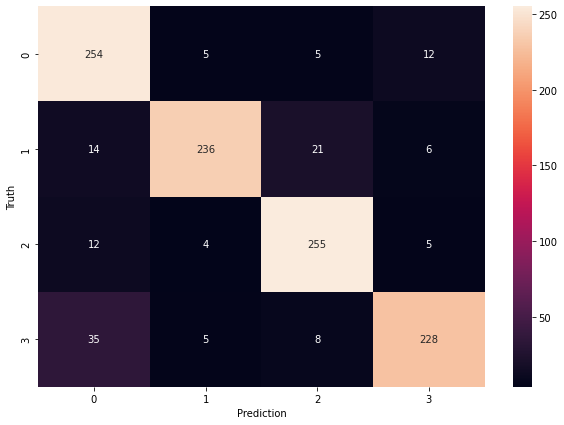

In [49]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Bag of n_grams: Exercise

In [50]:
import pandas as ps
df=pd.read_csv("Fake_Real_Data.csv")
print(df.shape)
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [51]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [52]:
df["label_num"]=df['label'].map({
    'Fake':0,
    'Real':1
})

In [53]:
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


# Modelling without Pre-processing Text data

In [55]:
X_train,X_test,y_train,y_test=train_test_split(df.Text,df.label_num,test_size=0.2,random_state=20222)

In [57]:
print("X_train Shape :",X_train.shape)
print("X_test Shape :",X_test.shape)

X_train Shape : (7920,)
X_test Shape : (1980,)


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,10))),
    ('Multi NB',MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       987
           1       0.99      0.99      0.99       993

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [60]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 


In [62]:
df["preprocessed_txt"]=df["Text"].apply(preprocess)

In [63]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY stab pathetic video...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,1,democrat trump agree work immigration bill wal...


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
X_train,X_test,y_train,y_test=train_test_split(df.preprocessed_txt,df.label_num,test_size=0.2,random_state=20222)
clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,10))),
    ('Multi NB',MultinomialNB())
])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       987
           1       0.98      0.99      0.99       993

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

